In [1]:
# display an image
from IPython.display import Image
Image(url='https://miro.medium.com/max/844/1*MyKDLRda6yHGR_8kgVvckg.png') # Thanks manan-bedi2908 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns' , None)

In [3]:
data = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
data.shape

(10000, 14)

In [5]:
data.dtypes.value_counts()

int64      9
object     3
float64    2
dtype: int64

In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df = data.drop(['RowNumber' , 'CustomerId' , 'Surname'] , axis=1)

In [8]:
# target 
df.Exited.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [9]:
# continuous and categorical variables

var_continuous = df.drop(['Exited' , 'Geography' , 'Gender' , 'HasCrCard' , 'IsActiveMember'] , axis = 1 )
var_categ = df[['Geography' , 'Gender' , 'HasCrCard' , 'IsActiveMember']]

In [10]:
var_continuous

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,619,42,2,0.00,1,101348.88
1,608,41,1,83807.86,1,112542.58
2,502,42,8,159660.80,3,113931.57
3,699,39,1,0.00,2,93826.63
4,850,43,2,125510.82,1,79084.10
...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64
9996,516,35,10,57369.61,1,101699.77
9997,709,36,7,0.00,1,42085.58
9998,772,42,3,75075.31,2,92888.52


In [11]:
var_categ

,Geography,Gender,HasCrCard,IsActiveMember
0,France,Female,1,1
1,Spain,Female,0,1
2,France,Female,1,0
3,France,Female,0,0
4,Spain,Female,1,1
...,...,...,...,...
9995,France,Male,1,0
9996,France,Male,1,1
9997,France,Female,0,1
9998,Germany,Male,1,0


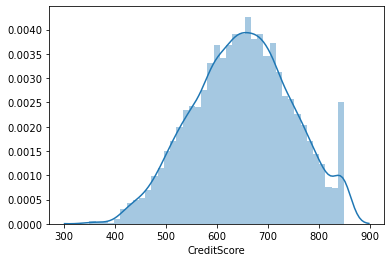

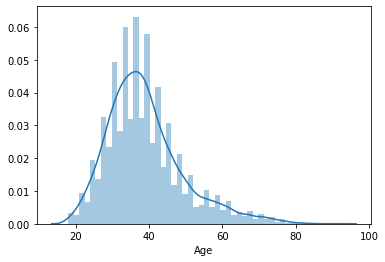

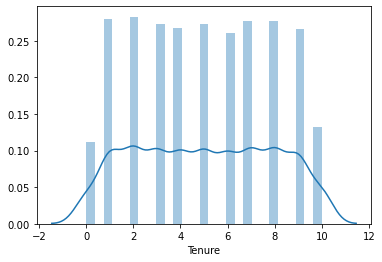

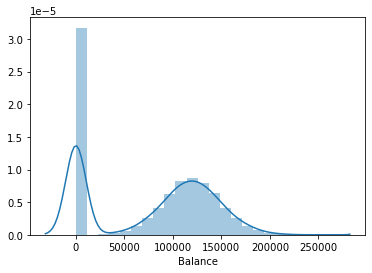

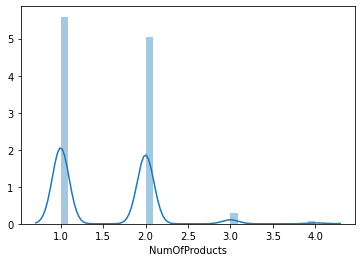

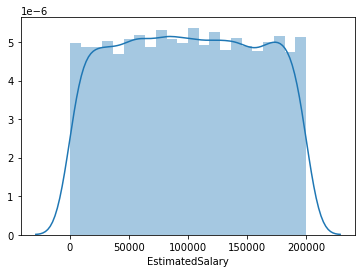

In [12]:
# Distributions continuous variables
for col in var_continuous:
    plt.figure()
    sns.distplot(df[col])

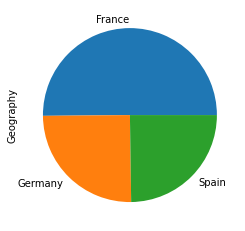

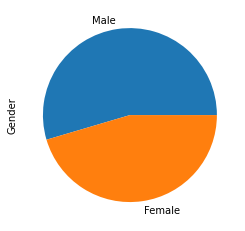

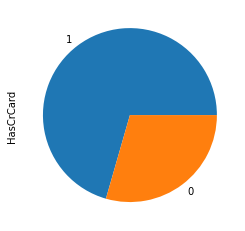

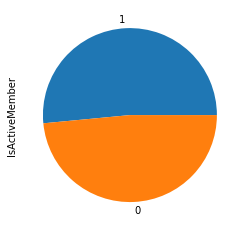

In [13]:
#viz categorical variables
for col in var_categ:
    plt.figure()
    df[col].value_counts().plot.pie()

In [14]:
# Dist target/variables

no_churn = df[df['Exited']==0]
churn = df[df['Exited'] == 1]

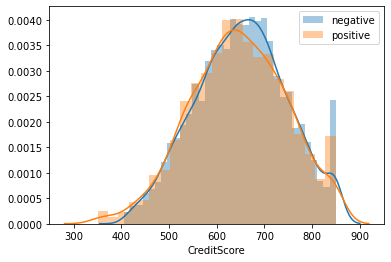

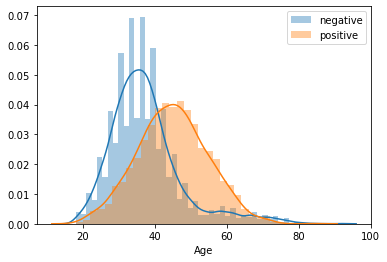

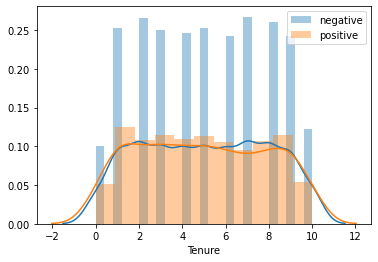

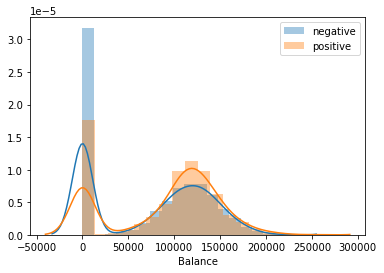

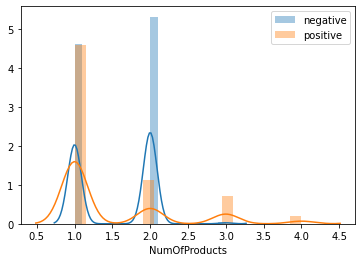

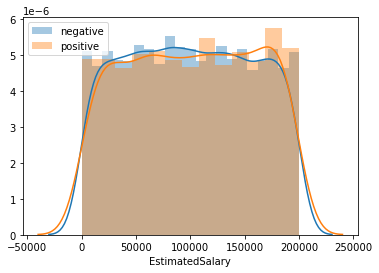

In [15]:
for col in var_continuous:
    plt.figure()
    sns.distplot(no_churn[col] , label = "negative")
    sns.distplot(churn[col] , label = "positive")
    plt.legend()

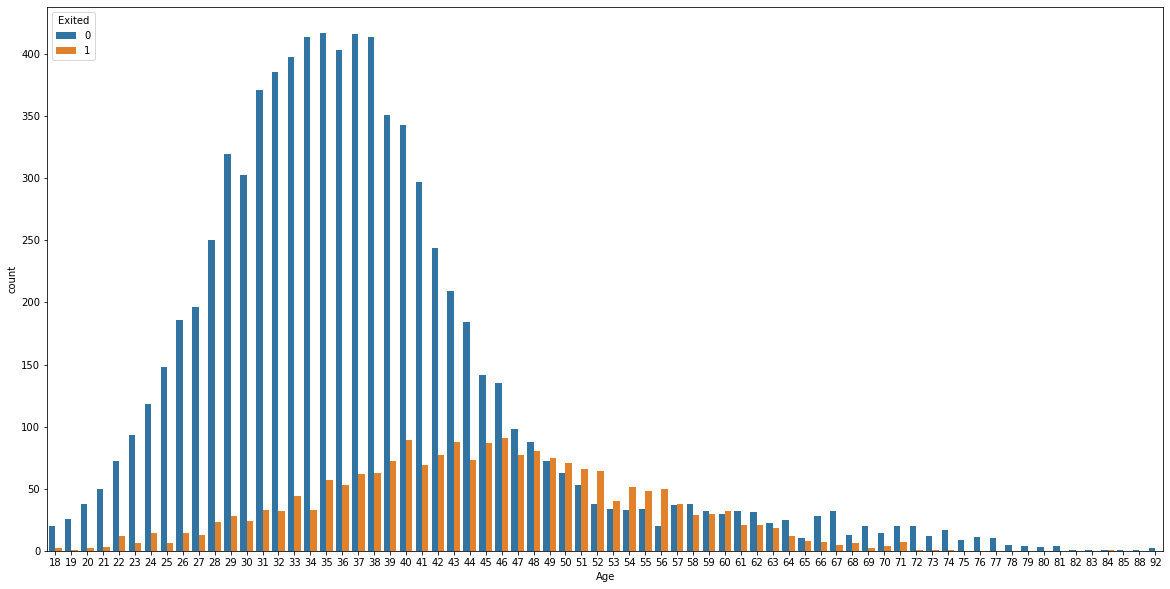

In [16]:
# Target / Age
plt.figure(figsize=(20,10))
sns.countplot(x='Age' , hue ='Exited' , data = df)

In [17]:
# Target / categorical variables
pd.crosstab(df['Exited'] , df.Geography)

Geography,France,Germany,Spain
Exited,,,
0,4204,1695,2064
1,810,814,413


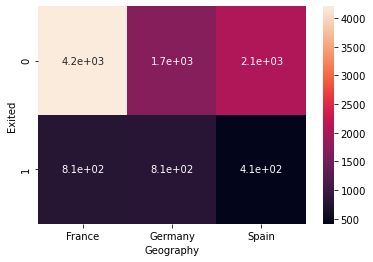

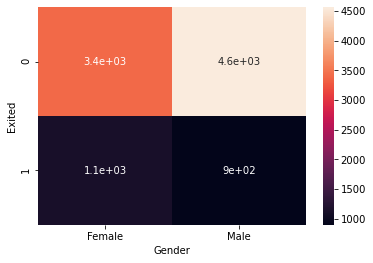

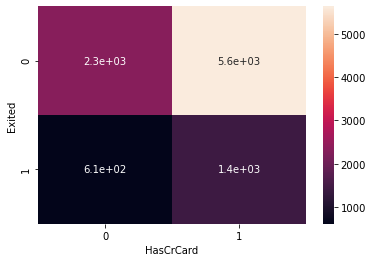

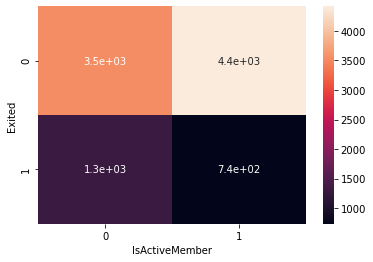

In [18]:
for col in var_categ:
    plt.figure()
    sns.heatmap(pd.crosstab(df['Exited'] , df[col]) , annot=True)

In [19]:
# Preprocessing - Encoding

df = pd.get_dummies(df , drop_first=True)

<Figure size 1080x1080 with 0 Axes>

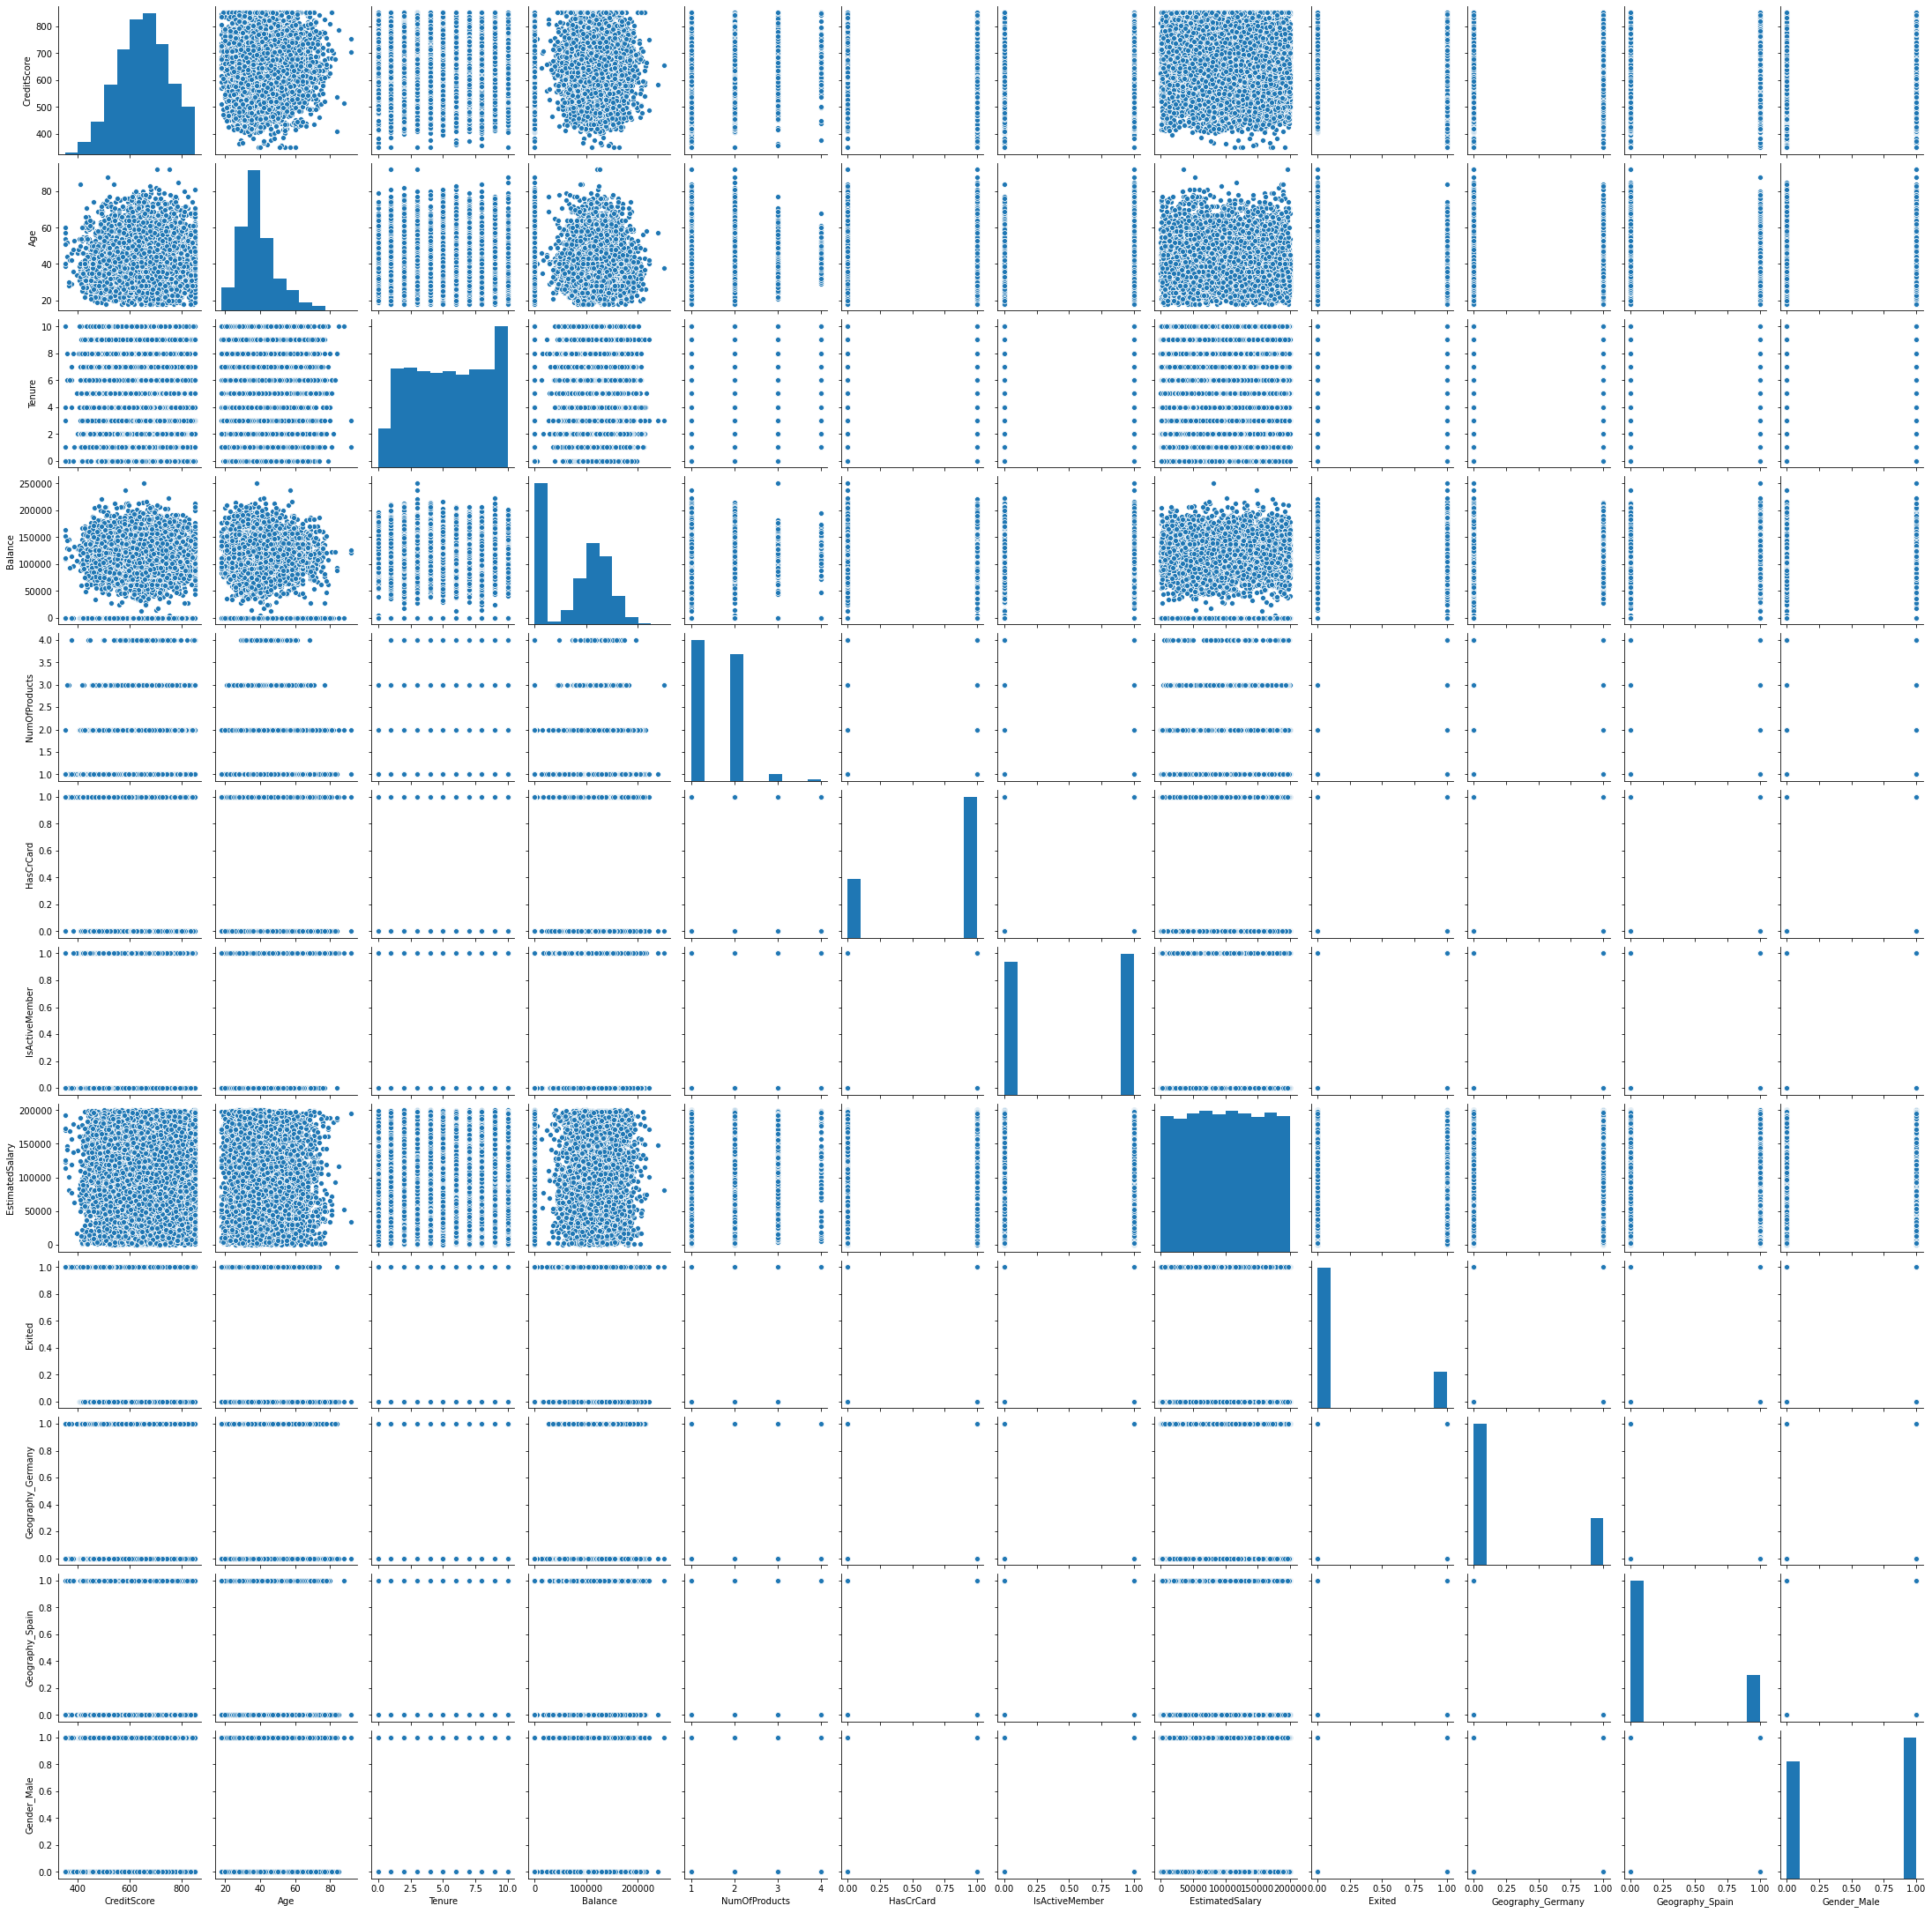

In [20]:
plt.figure(figsize=(15,15))
sns.pairplot(df)

In [21]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


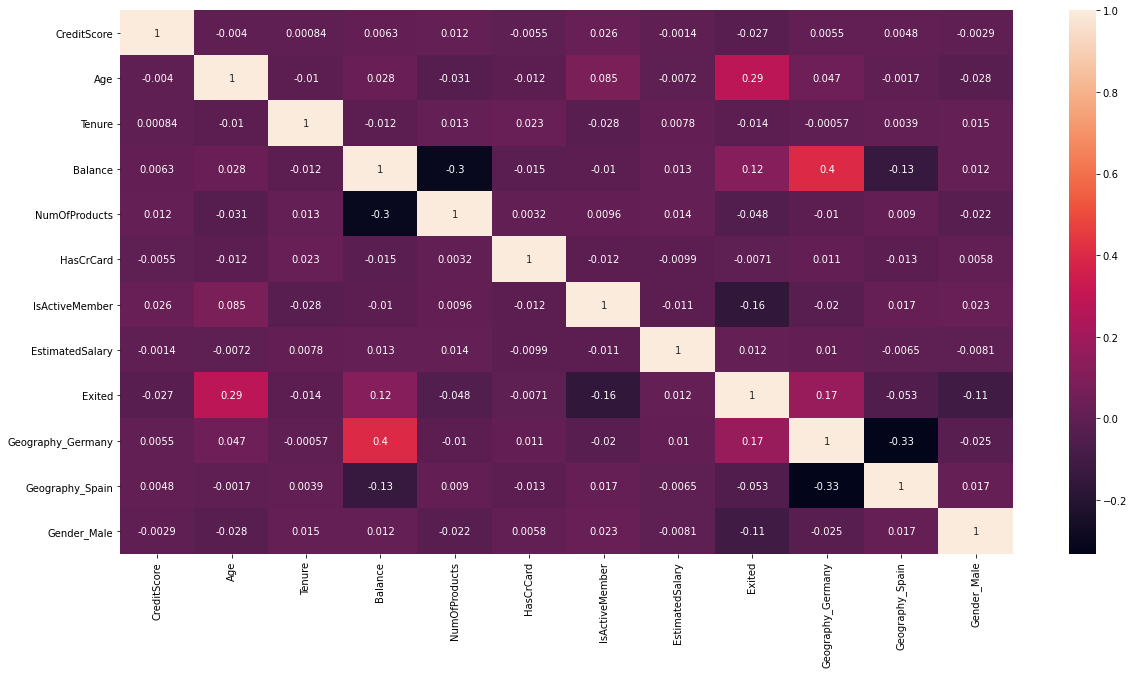

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr() , annot=True)

In [23]:
# Target and features 
X = df.drop(['Exited'] ,  axis=1)
y = df['Exited']


In [24]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [25]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [26]:
# train - test - split


from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state = 5)

In [27]:
# Standardizing the Dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
X_train

array([[ 1.03360928,  0.00825566,  0.34955973, ..., -0.58601101,
         1.74954671, -1.10665898],
       [ 0.78536369, -0.46826153, -0.69053865, ..., -0.58601101,
        -0.57157662,  0.90362073],
       [-0.64204841,  2.39084161, -0.69053865, ..., -0.58601101,
        -0.57157662, -1.10665898],
       ...,
       [-0.69376624, -0.75417184, -0.34383919, ..., -0.58601101,
        -0.57157662, -1.10665898],
       [ 0.29921609, -0.27765465,  0.34955973, ..., -0.58601101,
        -0.57157662,  0.90362073],
       [-1.66606145,  1.24720035, -1.38393756, ...,  1.70645259,
        -0.57157662, -1.10665898]])

In [29]:
# Features importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [30]:
print(model.feature_importances_)

[0.13445096 0.23341817 0.10587836 0.13419185 0.14223904 0.02205881
 0.03494079 0.13233687 0.02928352 0.01395459 0.01724704]


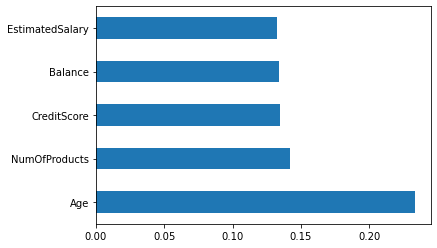

In [31]:
feat_importance = pd.Series(model.feature_importances_ , index=X.columns)
feat_importance.nlargest(5).plot(kind='barh') # 
plt.show()

### Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
y_pred = rf.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix , f1_score , classification_report
cm = confusion_matrix(y_test,y_pred)
#f1 = f1_score(y_test , y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred)) #1
#print(f1)

[[1538   57]
 [ 221  184]]
0.861
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1595
           1       0.76      0.45      0.57       405

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

